In [1]:
import numpy as np
import pandas as pd
from methods.analysis import *
# Seed the random number generators for reproducibility
np.random.seed(100)

### JRC

In [3]:
#Specify which experiments and which parameters you want to use
experiment_names= ['algebraic_nonunique_2','algebraic_nonunique_1','analytic_unique_1','analytic_unique_2']
dic_experiments = {'algebraic_nonunique_1': "non unique",
                   'algebraic_nonunique_2': "non unique",
                   'analytic_unique_1': "unique",
                   'analytic_unique_2': "unique",
                   'analytic_nonunique_1': "unique"}
len_noise=10
noise_levels = [0] + [10**(i-10) for i in range(0,len_noise)]
fd_orders=[2,6,10]

In [4]:
all_results = pd.DataFrame(columns=["True_Class", "Pred_Class","C2","noise_level","fd_order","experiment"])
for experiment_name in experiment_names:
    for fd_order in fd_orders:
        true_class = dic_experiments[experiment_name]
        result_exp = perform_experiment_jrc(noise_levels,fd_order,experiment_name,true_class)
        result_exp["experiment"] = experiment_name
        all_results = pd.concat([all_results,result_exp])
all_results["Correct_Classification"]=all_results["True_Class"]==all_results["Pred_Class"]

Performing experiment algebraic_nonunique_2 1/sqrt(t + x) with order 2, C2 = 1.00e-03
Performing experiment algebraic_nonunique_2 1/sqrt(t + x) with order 6, C2 = 1.00e-03
Performing experiment algebraic_nonunique_2 1/sqrt(t + x) with order 10, C2 = 1.00e-03
Performing experiment algebraic_nonunique_1 1/(t + x) with order 2, C2 = 1.00e-03
Performing experiment algebraic_nonunique_1 1/(t + x) with order 6, C2 = 1.00e-03
Performing experiment algebraic_nonunique_1 1/(t + x) with order 10, C2 = 1.00e-03
Performing experiment analytic_unique_1 (t + x)*acos(1/cosh(0.471435163732493*t)) with order 2, C2 = 1.00e-03
Performing experiment analytic_unique_1 (t + x)*acos(1/cosh(0.471435163732493*t)) with order 6, C2 = 1.00e-03
Performing experiment analytic_unique_1 (t + x)*acos(1/cosh(0.471435163732493*t)) with order 10, C2 = 1.00e-03
Performing experiment analytic_unique_2 (t + x)*asin(1/cosh(0.471435163732493*t)) with order 2, C2 = 1.00e-03
Performing experiment analytic_unique_2 (t + x)*asin(

In [10]:
#Save results
all_results.to_csv("../results/all_results_plots_jrc.csv")

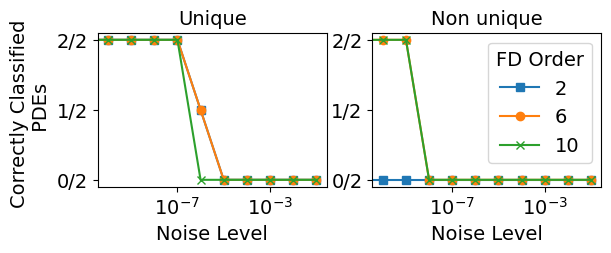

In [13]:
#Read results
all_results= pd.read_csv("../results/all_results_plots_jrc.csv")
results_filter = all_results[all_results["fd_order"].isin([2,6,10])]
N = len(results_filter["experiment"].unique())
#Plot the number of classified equations per noise level
N_nonunique = len(results_filter[results_filter["True_Class"]=="non unique"]["experiment"].unique())
N_unique = len(results_filter[results_filter["True_Class"]=="unique"]["experiment"].unique())
columns = ["noise_level","fd_order","True_Class","Correct_Classification"]
plot_results = results_filter[columns].groupby(["noise_level","fd_order","True_Class"]).sum().reset_index()
plot_results
path = "../results/jrc_results_analysis.png"
plot_classif_vs_noiselevel_unique_nonunique(plot_results,N_unique,N_nonunique,path)

### SFranCo

In [14]:
experiment_names= ['linear_nonunique_1','linear_unique_1','linear_unique_1.1','linear_unique_1.2']
dic_experiments = {'linear_nonunique_1': "non unique",
                   'linear_unique_1':"unique",
                   'linear_unique_1.1': "unique",
                   'linear_unique_1.2': "unique",
                   'linear_unique_1.3': "unique"}
len_noise=10
noise_levels = [0] + [10**(i-10) for i in range(0,len_noise)]

In [15]:
all_results = pd.DataFrame(columns=["True_Class", "Pred_Class","C2","noise_level","experiment"])
for experiment_name in experiment_names:
    true_class = dic_experiments[experiment_name]
    result_exp = perform_experiment_sfranco(noise_levels,experiment_name,true_class)
    result_exp["experiment"] = experiment_name
    all_results = pd.concat([all_results,result_exp])
all_results = all_results.rename(columns={"order":"fd_order"})

Performing Experiment linear_nonunique_1
Performing Experiment linear_unique_1
Performing Experiment linear_unique_1.1
Performing Experiment linear_unique_1.2


In [17]:
#Save results
all_results.to_csv("../results/all_results_plots_sfranco.csv")

In [18]:
#Read results
all_results= pd.read_csv("../results/all_results_plots_sfranco.csv")
results_filter = all_results[all_results["fd_order"].isin([2,6,10])]
N = len(results_filter["experiment"].unique())

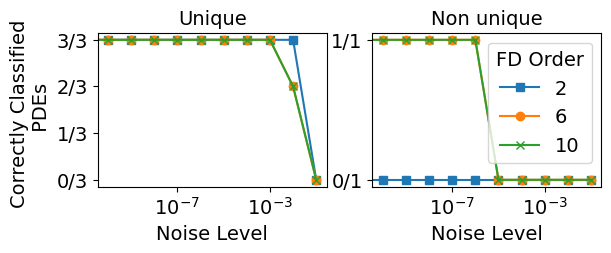

In [19]:
#Plot the number of classified equations per noise level while differentiation between unique and non unique
columns = ["noise_level","fd_order","True_Class","Correct_Classification"]
N_nonunique = len(results_filter[results_filter["True_Class"]=="non unique"]["experiment"].unique())
N_unique = len(results_filter[results_filter["True_Class"]=="unique"]["experiment"].unique())
plot_results = results_filter[columns].groupby(["noise_level","fd_order","True_Class"]).sum().reset_index()
plot_results
path = "../results/sfranco_results_analysis.png"
plot_classif_vs_noiselevel_unique_nonunique(plot_results,N_unique,N_nonunique,path)